# Worldbank Data on Region

Using data comes from below regions:

* North America
* European Union
* South Asia

Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
na_df = pd.read_csv('data/NorthAmerica-worldbank-data/NorthAmerica_data.csv',skiprows=3)
eu_df = pd.read_csv('data/EuropeanUnion-worldbank-data/EuropeanUnion_data.csv',skiprows=3)
sa_df = pd.read_csv('data/SouthAsia-worldbank-data/SouthAsia_data.csv',skiprows=3)
na_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,North America,NAC,"Internally displaced persons, new displacement...",VC.IDP.NWDS,NaN,NaN,NaN,NaN,NaN,NaN,...,9.010000e+05,3.080000e+05,3.980000e+04,7.600000e+04,1.200000e+06,1.771000e+06,1.266000e+06,9.570000e+05,1.740050e+06,NaN
1,North America,NAC,Merchandise exports to low- and middle-income ...,TX.VAL.MRCH.R3.ZS,13.308599,12.823959,11.921267,11.129143,11.457571,10.817422,...,1.846202e+01,1.862607e+01,1.879614e+01,1.899456e+01,1.880176e+01,1.886043e+01,1.912085e+01,1.874249e+01,NaN,NaN
2,North America,NAC,Medium and high-tech exports (% manufactured e...,TX.MNF.TECH.ZS.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,North America,NAC,Merchandise imports from low- and middle-incom...,TM.VAL.MRCH.OR.ZS,26.444098,25.383333,24.621123,24.381797,23.792258,21.176526,...,4.604858e+01,4.558559e+01,4.521072e+01,4.628765e+01,4.679283e+01,4.757890e+01,4.738733e+01,4.576980e+01,NaN,NaN
4,North America,NAC,"Tariff rate, applied, simple mean, primary pro...",TM.TAX.TCOM.SM.AR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,North America,NAC,"Transport services (% of service exports, BoP)",BX.GSR.TRAN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.314795e+01,1.277806e+01,1.227282e+01,1.130387e+01,1.082568e+01,1.073384e+01,1.105655e+01,1.060698e+01,8.365044e+00,NaN
1439,North America,NAC,"Portfolio investment, net (BoP, current US$)",BN.KLT.PTXL.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1440,North America,NAC,"Charges for the use of intellectual property, ...",BM.GSR.ROYL.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.597319e+10,4.710626e+10,4.928592e+10,4.591925e+10,5.354993e+10,5.624763e+10,5.546758e+10,5.481847e+10,5.669066e+10,NaN
1441,North America,NAC,Rural land area (sq. km),AG.LND.TOTL.RU.K2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Create a helper method for searching indicators of interest

In [3]:
def find_rows(df,interest):
    for i in range(len(df)):
        indicator = df.iloc[i]['Indicator Name']
        if interest in indicator:
            print(i,indicator)

In [4]:
find_rows(na_df,'renewables and waste')

547 Combustible renewables and waste (% of total energy)


## Comparing combustible renewables and waste

In [5]:
find_rows(na_df,'Combustible renewables and waste (% of total energy)')
find_rows(eu_df,'Combustible renewables and waste (% of total energy)')
find_rows(sa_df,'Combustible renewables and waste (% of total energy)')

547 Combustible renewables and waste (% of total energy)
309 Combustible renewables and waste (% of total energy)
533 Combustible renewables and waste (% of total energy)


## Plot the data

Text(0.5, 1.0, ' Combustible renewables and waste (% of total energy) ')

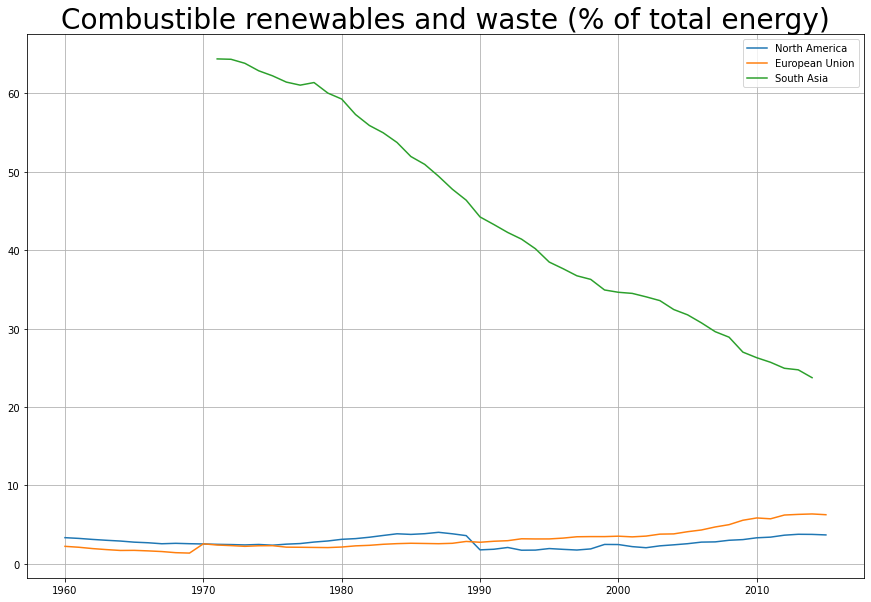

In [6]:
def plot_indicator(df,row,label):
    plt.plot(range(1960,2021),df.iloc[row]['1960':'2020'],label=label)
plt.figure(figsize=(15,10))
plot_indicator(na_df,547,'North America')
plot_indicator(eu_df,309,'European Union')
plot_indicator(sa_df,533,'South Asia')
plt.legend()
plt.grid()
plt.title(' Combustible renewables and waste (% of total energy) ',fontsize = 28)

# US States Covid Data

## Create a pivot table
To begin with, merge the three dataframe
index is the date, and columns are the values in the location column
the value is the  GDP per unit of energy use (PPP $ per kg of oil equivalent).
We can then plot just the columns we want!

In [7]:

covid_url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
df = pd.read_csv('data/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')
df['dates'] = pd.to_datetime(df['submission_date'], format='%m/%d/%Y')
df = df.sort_values(by=['state', 'dates'])
df


,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,dates
28118,01/22/2020,AK,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,NaN,NaN,2020-01-22
13981,01/23/2020,AK,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,NaN,NaN,2020-01-23
26201,01/24/2020,AK,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,NaN,NaN,2020-01-24
26293,01/25/2020,AK,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,NaN,NaN,2020-01-25
29365,01/26/2020,AK,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,NaN,NaN,2020-01-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43044,03/05/2022,WY,155426,122506.0,32920.0,0,0.0,1741,1741.0,0.0,0,0.0,03/07/2022 01:47:14 PM,Agree,Agree,2022-03-05
10434,03/06/2022,WY,155426,122506.0,32920.0,0,0.0,1741,1741.0,0.0,0,0.0,03/07/2022 03:00:11 PM,Agree,Agree,2022-03-06
9837,03/07/2022,WY,155492,122570.0,32922.0,66,2.0,1741,1741.0,0.0,0,0.0,03/08/2022 02:50:46 PM,Agree,Agree,2022-03-07
10507,03/08/2022,WY,155558,122618.0,32940.0,66,18.0,1749,1749.0,0.0,8,0.0,03/09/2022 02:28:56 PM,Agree,Agree,2022-03-08


In [8]:
df.columns

Index(['submission_date', 'state', 'tot_cases', 'conf_cases', 'prob_cases',
       'new_case', 'pnew_case', 'tot_death', 'conf_death', 'prob_death',
       'new_death', 'pnew_death', 'created_at', 'consent_cases',
       'consent_deaths', 'dates'],
      dtype='object')

In [9]:
df['state'].unique()

array(['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL',
       'FSM', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA',
       'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND',
       'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'NYC', 'OH', 'OK', 'OR', 'PA',
       'PR', 'PW', 'RI', 'RMI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI',
       'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [12]:
column = 'tot_death'

df2 = pd.pivot_table(df, values=column, index=["dates"], columns=["state"])
df2[['NY','TX','WA','CA']]

state,NY,TX,WA,CA
dates,,,,
2020-01-22,0,0,0,0
2020-01-23,0,0,0,0
2020-01-24,0,0,0,0
2020-01-25,0,0,0,0
2020-01-26,0,0,0,0
...,...,...,...,...
2022-03-05,27031,84356,12025,85353
2022-03-06,27038,84409,12025,85353
2022-03-07,27052,84418,12076,85849


Text(0, 0.5, 'Total Death')

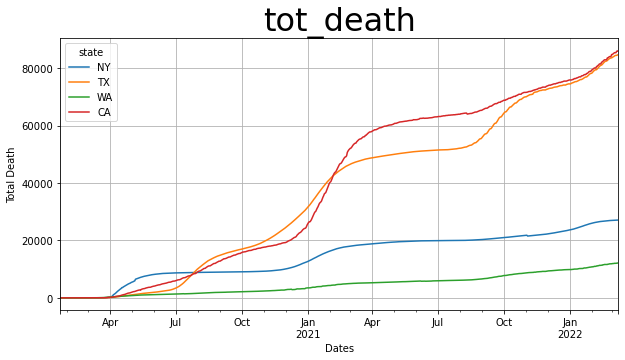

In [15]:
df2[['NY','TX','WA','CA']].plot(figsize=(10,5))
plt.grid()
plt.title(column,fontsize=32)
plt.xlabel('Dates')
plt.ylabel("Total Death")

In [28]:
newcases = df[df['new_case']>0].groupby('state')['new_case'].agg([max, np.mean])
newcases = newcases.sort_values(ascending=False, by='max').head(10)
newcases

,max,mean
state,,
CA,319809,12852.210756
NYC,125572,3282.574713
WI,83187,2295.052402
MI,79353,3414.773775
IL,77833,4390.324675
FL,76618,7901.424695
TX,75817,8806.786008
MA,64715,2448.655474
CO,51101,1903.619048
